In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

**Read the data**

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\P7110289\\Downloads'

In [2]:
cubicz=pd.read_csv('cubic_zirconia.csv')

In [3]:
cubicz.duplicated().sum()

0

In [6]:
cubicz.shape

(26967, 11)

**Check the Head**

In [7]:
cubicz.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
cubicz=cubicz.drop('Unnamed: 0',axis=1) #1st UnName column doesnot help for analysis. So delete

**Get the info**

In [9]:
cubicz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


**Check Null Values**

In [10]:
cubicz.isnull().sum()  #Check Null Values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
cubicz.depth.isnull().sum()/26967*100  # % of Null values in the column - depth

2.5846404865205623

In [12]:
zeros = cubicz.depth == 0
zeros.sum()

0

In [13]:
# depth na % is only 2.5 . So, fill na with mean as mean and std is same
cubicz["depth"].fillna(cubicz.mean(), inplace = True)

**Describe**

In [14]:
cubicz.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


**Check zero values in other columns**

In [13]:
# We have noticed 0 values in x,y,z. and it has no meaning for Cubiz Zeronica.

print(cubicz.loc[cubicz['x'] == 0])
print(cubicz.loc[cubicz['y'] == 0])
print(cubicz.loc[cubicz['z'] == 0])

       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
6215    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381
       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
6215    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381
       carat      cut color clarity  depth  table     x     y    z  price
5821    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
6034    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207
6215    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
10827   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265
12498   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
1268

In [15]:
z0=cubicz.loc[cubicz['z'] == 0]
z0['z'].count().sum()

9

In [15]:
9/26967*100  # % of 0 values in z with toatal data

0.03337412392924686

In [16]:
cubicz = cubicz.loc[(cubicz[['x','y','z']]!=0).all(axis=1)]
cubicz.shape

(26958, 10)

**Get the Summary Statistics**

In [17]:
cubicz.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26958,NaN,NaN,NaN,0.79819,0.477602,0.2,0.4,0.7,1.05,4.5
cut,26958,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26958,7,G,5658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26958,8,SI1,6570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26261,NaN,NaN,NaN,61.7453,1.41239,50.8,61,61.8,62.5,73.6
table,26958,NaN,NaN,NaN,57.4553,2.23123,49,56,57,59,79
x,26958,NaN,NaN,NaN,5.7301,1.12671,3.73,4.71,5.69,6.55,10.23
y,26958,NaN,NaN,NaN,5.73383,1.16434,3.71,4.7125,5.7,6.54,58.9
z,26958,NaN,NaN,NaN,3.53924,0.717838,1.07,2.9,3.52,4.04,31.8
price,26958,NaN,NaN,NaN,3938.31,4023.36,326,945,2375,5358,18818


**Check Duplicate Values**

In [18]:
cubicz.duplicated().sum()

33

In [19]:
print('Before',cubicz.shape)
cubicz.drop_duplicates(inplace=True) 
print('After',cubicz.shape)

Before (26958, 10)
After (26925, 10)


**Check for Object Data Types and See if there is any Numerical column**

In [20]:
cubicz.select_dtypes(include='object').head(8)

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
5,Ideal,D,VS2
6,Good,H,SI1
7,Premium,E,SI1


All object type variables values looks good

**Variable analysis**

,len,min,max
cut,,,
Fair,779,369,18574
Good,2434,335,18707
Ideal,10805,326,18804
Premium,6880,326,18795
Very Good,6027,336,18818


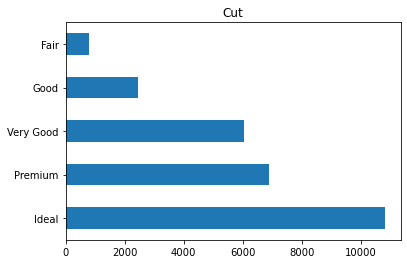

In [21]:
cubicz['cut'].value_counts().plot(kind='barh')
plt.title("Cut")
cubicz.groupby(['cut']).price.agg([len, min, max])

,len,min,max
color,,,
D,3341,357,18526
E,4916,326,18731
F,4722,357,18791
G,5650,361,18818
H,4091,337,18795
I,2765,336,18795
J,1440,335,18701


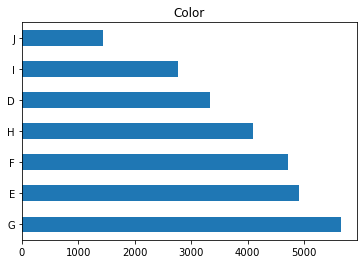

In [22]:
cubicz['color'].value_counts().plot(kind='barh')
plt.title("Color")
cubicz.groupby(['color']).price.agg([len, min, max])

,len,min,max
clarity,,,
I1,362,345,18531
IF,891,369,18552
SI1,6564,326,18818
SI2,4561,326,18804
VS1,4086,338,18795
VS2,6092,357,18791
VVS1,1839,336,18445
VVS2,2530,336,18718


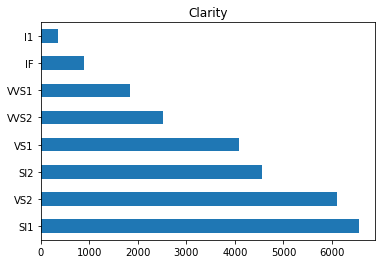

In [23]:
cubicz['clarity'].value_counts().plot(kind='barh')
plt.title("Clarity")
cubicz.groupby(['clarity']).price.agg([len, min, max])

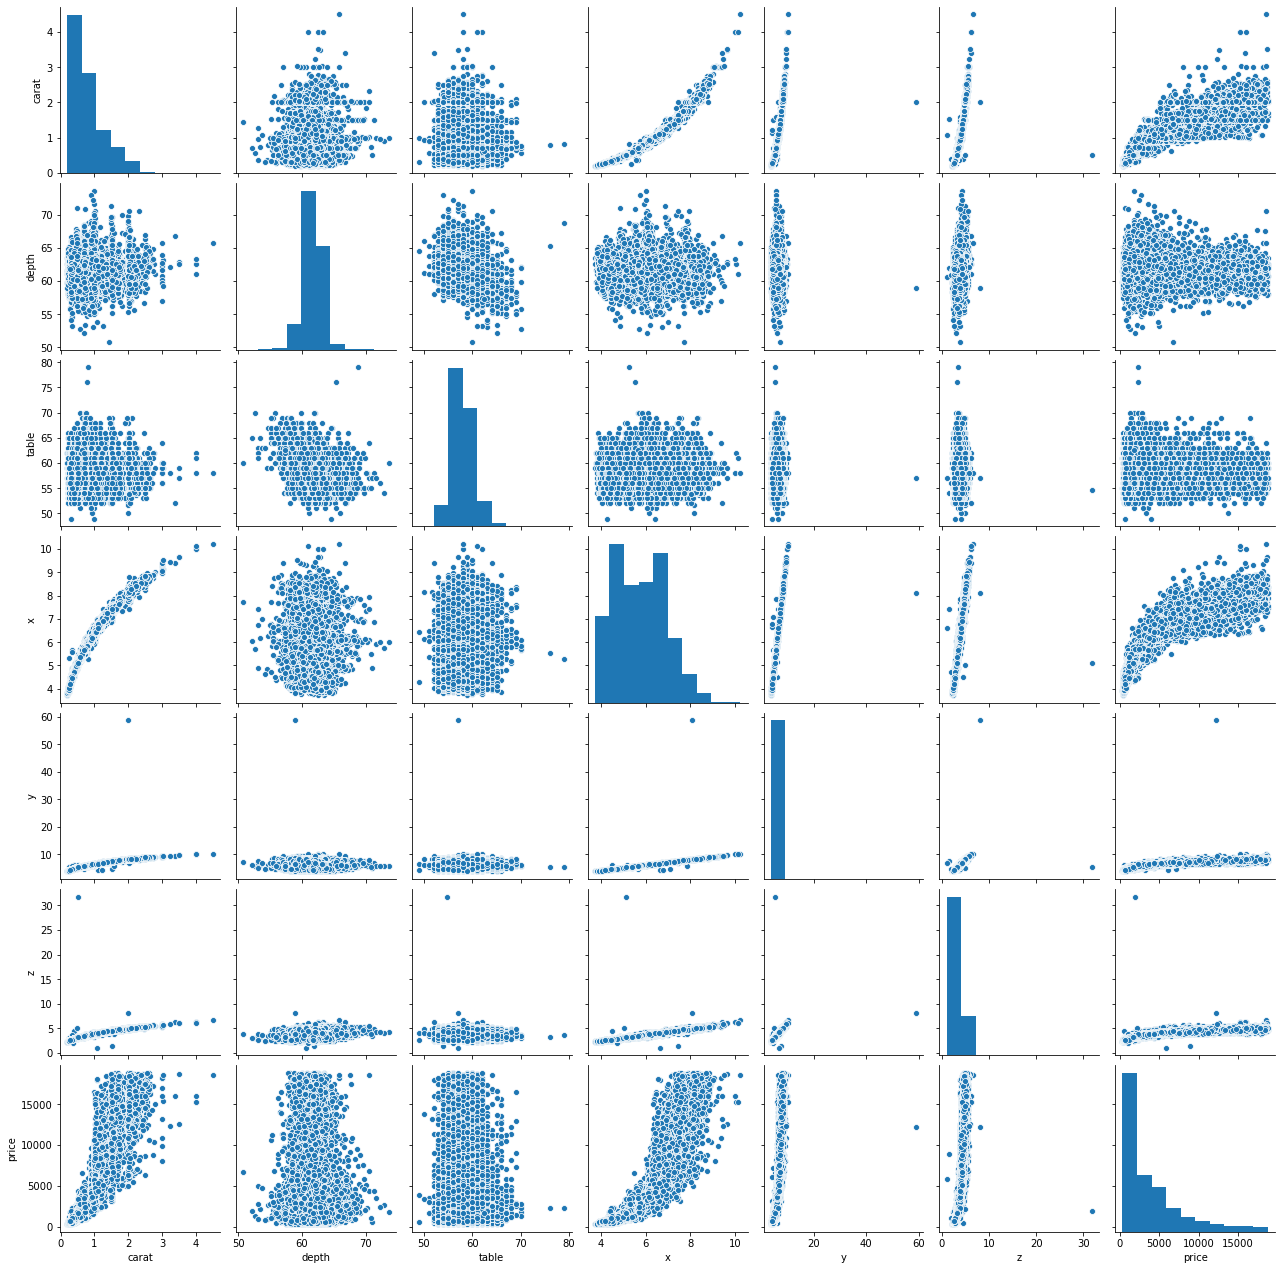

In [24]:
sns.pairplot(cubicz)

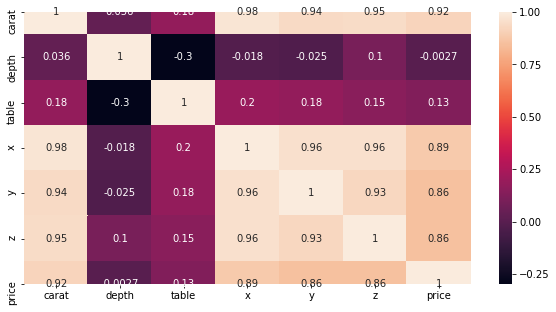

In [32]:
plt.figure(figsize = (10,5))
sns.heatmap(cubicz.corr(), annot=True)  # plot the correlation coefficients as a heatmap

depth and table has less corelation. So we can remove them consider gemstone business with other attributes.

In [25]:
cubicz = cubicz.drop(['table','depth'],axis=1) 

In [26]:
cubicz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   x        26925 non-null  float64
 5   y        26925 non-null  float64
 6   z        26925 non-null  float64
 7   price    26925 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 3.1+ MB


**Check for Outliers**

Shape before Outliers Treatment (26925, 8)


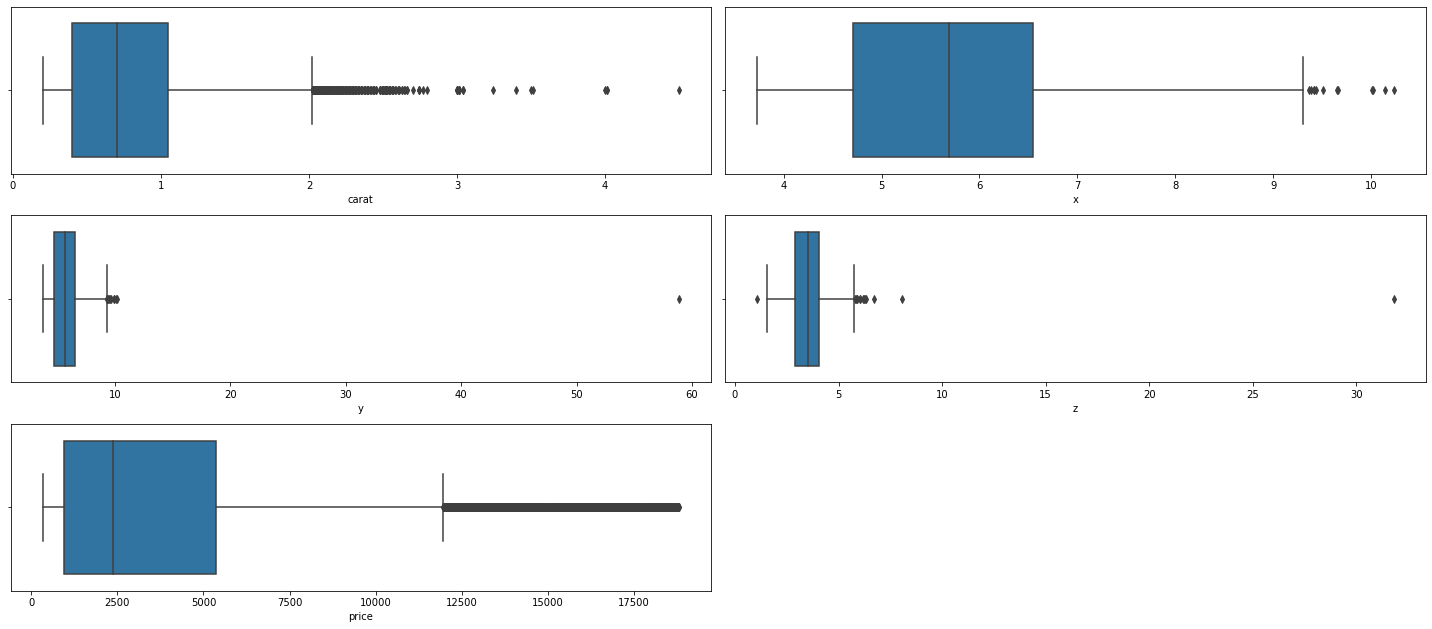

In [27]:
data_plot=cubicz[['carat','x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(7,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cubicz.shape)

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
lratio,uratio=remove_outlier(cubicz['carat'])
cubicz['carat']=np.where(cubicz['carat']>uratio,uratio,cubicz['carat'])
cubicz['carat']=np.where(cubicz['carat']<lratio,lratio,cubicz['carat'])

lratio,uratio=remove_outlier(cubicz['x'])
cubicz['x']=np.where(cubicz['x']>uratio,uratio,cubicz['x'])
cubicz['x']=np.where(cubicz['x']<lratio,lratio,cubicz['x'])

lratio,uratio=remove_outlier(cubicz['y'])
cubicz['y']=np.where(cubicz['y']>uratio,uratio,cubicz['y'])
cubicz['y']=np.where(cubicz['y']<lratio,lratio,cubicz['y'])

lratio,uratio=remove_outlier(cubicz['z'])
cubicz['z']=np.where(cubicz['z']>uratio,uratio,cubicz['z'])
cubicz['z']=np.where(cubicz['z']<lratio,lratio,cubicz['z'])

lratio,uratio=remove_outlier(cubicz['price'])
cubicz['price']=np.where(cubicz['price']>uratio,uratio,cubicz['price'])
cubicz['price']=np.where(cubicz['price']<lratio,lratio,cubicz['price'])

Shape before Outliers Treatment (26925, 8)


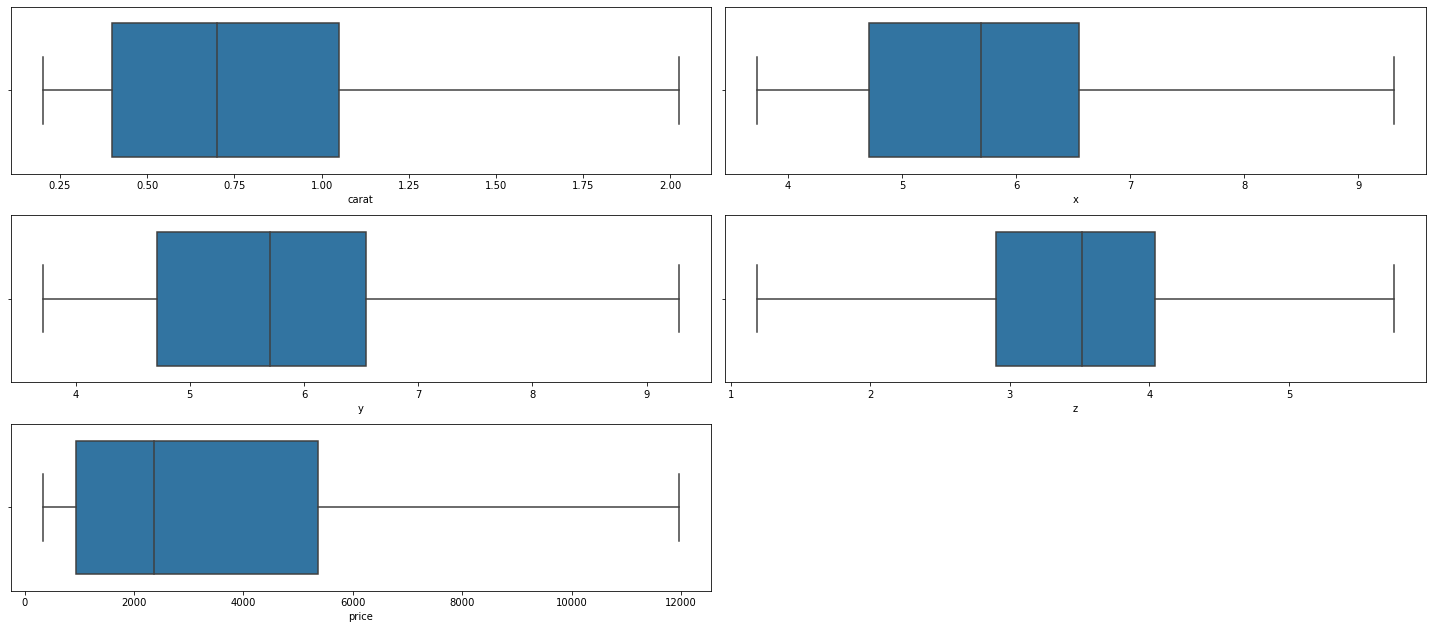

In [30]:
data_plot=cubicz[['carat','x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(7,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cubicz.shape)

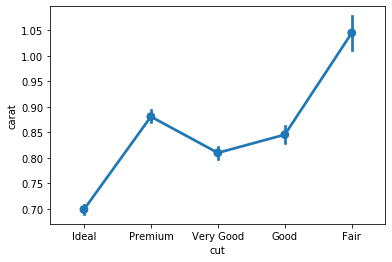

In [42]:
sns.pointplot(x="cut", y="carat", data=cubicz)

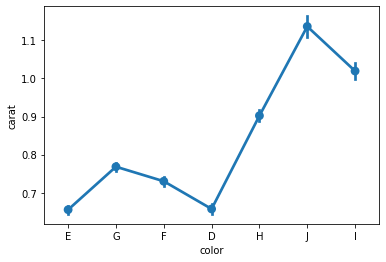

In [44]:
sns.pointplot(x="color", y="carat", data=cubicz)

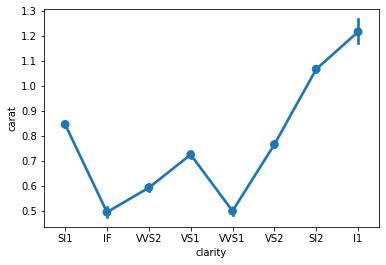

In [45]:
sns.pointplot(x="clarity", y="carat", data=cubicz)

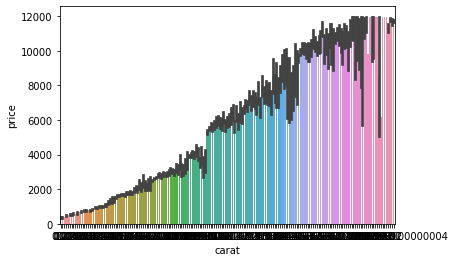

In [51]:
sns.barplot(x="carat", y="price", data=cubicz)

**Convert categorical variables to continous**

In [32]:
cubicz['cut']=cubicz['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
cubicz['color']=cubicz['color'].map({'J':1,'I':2,'D':3,'H':4,'F':5,'E':6,'G':7})
cubicz['clarity']=cubicz['clarity'].map({'I1':1,'IF':2,'VVS1':3,'VVS2':4,'VS1':5,'SI2':6,'VS2':7,'SI1':8})

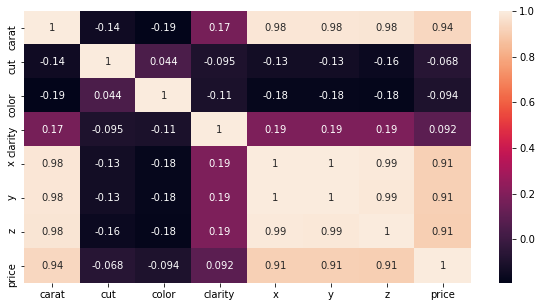

In [33]:
plt.figure(figsize = (10,5))
sns.heatmap(cubicz.corr(), annot=True)

“cut”, “color” and “clarity” has less corelation with price but they are important features for gemstone.
As carat makes value count from “cut”, “color” and “clarity” of a gem stone, we can have calculated features.

In [34]:
cubicz['cut_carat']=cubicz['cut']/cubicz['carat']
cubicz['color_carat']=cubicz['color']/cubicz['carat']
cubicz['clarity_carat']=cubicz['clarity']/cubicz['carat']
cubicz = cubicz.drop(['cut','color','clarity'], axis=1)

In [35]:
cubicz.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.793119,0.461998,0.200000,0.400000,0.700000,1.050000,2.025000
x,26925.0,5.729217,1.125500,3.730000,4.710000,5.690000,6.550000,9.310000
y,26925.0,5.731159,1.117494,3.710000,4.710000,5.700000,6.540000,9.285000
z,26925.0,3.537625,0.695681,1.190000,2.900000,3.520000,4.040000,5.750000
price,26925.0,3734.453965,3466.394724,326.000000,945.000000,2373.000000,5353.000000,11965.000000
cut_carat,26925.0,7.029769,4.640879,0.493827,3.278689,5.555556,10.000000,25.000000
color_carat,26925.0,8.461062,6.045157,0.493827,3.883495,6.730769,12.121212,30.434783
clarity_carat,26925.0,10.075632,6.058296,0.493827,5.555556,8.219178,13.333333,38.095238


**Split the Data**

In [36]:
x=cubicz.drop(['price'],axis=1) 
y=cubicz.price

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.30)

In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18847 entries, 5030 to 235
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          18847 non-null  float64
 1   x              18847 non-null  float64
 2   y              18847 non-null  float64
 3   z              18847 non-null  float64
 4   cut_carat      18847 non-null  float64
 5   color_carat    18847 non-null  float64
 6   clarity_carat  18847 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


In [66]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8078 entries, 11971 to 25166
Data columns (total 7 columns):
carat            8078 non-null float64
x                8078 non-null float64
y                8078 non-null float64
z                8078 non-null float64
cut_carat        8078 non-null float64
color_carat      8078 non-null float64
clarity_carat    8078 non-null float64
dtypes: float64(7)
memory usage: 504.9 KB


**Option 1 - using sklearn.linear_model**

In [41]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

*RSquare*

In [68]:
# On the training data
model.score(x_train, y_train)

0.887856308398555

In [69]:
# On the test data
model.score(x_test, y_test)

0.8886373035296826

**#RMSE**

In [70]:
#RMSE on Training data
predicted_train=model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1158.0920887304392

In [72]:
#RMSE on Testing data
predicted_test=model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1163.011723278259

**Option 2 - Using Stats model**

In [73]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

,carat,x,y,z,cut_carat,color_carat,clarity_carat,price
5030,1.10,6.53,6.58,4.15,1.818182,5.454545,5.454545,4065.0
12108,1.01,6.30,6.38,4.06,2.970297,2.970297,5.940594,5166.0
20181,0.67,5.60,5.64,3.41,2.985075,2.985075,10.447761,1708.0
4712,0.76,6.05,5.97,3.47,2.631579,9.210526,10.526316,2447.0
2548,1.01,6.37,6.34,3.99,3.960396,6.930693,4.950495,6618.0


In [74]:
expr= 'price ~ carat + x + y + z + cut_carat + color_carat + clarity_carat'

In [75]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       -3988.352389
carat            7432.690922
x               -2576.309312
y                3156.130918
z                -619.009895
cut_carat          73.495154
color_carat        50.455117
clarity_carat     -25.507856
dtype: float64

In [76]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.131e+04
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:46:37   Log-Likelihood:            -1.5970e+05
No. Observations:               18847   AIC:                         3.194e+05
Df Residuals:                   18839   BIC:                         3.195e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3988.3524    308.556    -12.926

In [77]:
#Root Mean Squared Error - RMSE
np.sqrt(lm1.mse_resid)

1158.3379551073363

In [78]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
np.sqrt(mse)

1158.0920887304344

In [79]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

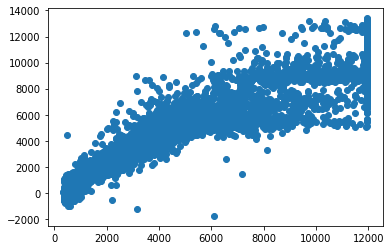

In [80]:
plt.scatter(y_test, y_pred)
plt.show()

In [81]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3988.35) * Intercept + (7432.69) * carat + (-2576.31) * x + (3156.13) * y + (-619.01) * z + (73.5) * cut_carat + (50.46) * color_carat + (-25.51) * clarity_carat + 

**Check with other models comparing Liner Regression.**

In [83]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [84]:
annr = MLPRegressor(hidden_layer_sizes=(100),random_state=1, max_iter=1000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=1)
dtr = tree.DecisionTreeRegressor(random_state=1)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    if i != annr:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    elif i==annr:
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

D:\Deployment\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        1158.092089  1163.011723        0.887856    0.888637
Decision Tree Regressor     7.294255   559.498339        0.999996    0.974227
Random Forest Regressor   181.227579   451.137582        0.997254    0.983243
ANN Regressor            1015.825558  1028.431313        0.913717    0.912919


D:\Deployment\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Grid Search on Decision Tree**

In [85]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=1)
grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}


[Text(205.77312002665326, 210.645, 'carat <= 0.995\nmse = 11959453.687\nsamples = 18847\nvalue = 3729.152'),
 Text(131.71971907833745, 197.055, 'y <= 5.525\nmse = 1197207.156\nsamples = 12167\nvalue = 1610.98'),
 Text(83.98002742583436, 183.465, 'carat <= 0.475\nmse = 261049.36\nsamples = 8754\nvalue = 1053.663'),
 Text(45.69027348578492, 169.875, 'clarity/carat <= 12.862\nmse = 59211.203\nsamples = 6190\nvalue = 792.143'),
 Text(14.776970024721878, 156.285, 'x <= 4.545\nmse = 59973.237\nsamples = 2119\nvalue = 974.57'),
 Text(4.735499072929542, 142.695, 'carat <= 0.295\nmse = 31538.357\nsamples = 1037\nvalue = 842.468'),
 Text(1.7933250927070457, 129.10500000000002, 'z <= 2.525\nmse = 11310.333\nsamples = 132\nvalue = 607.652'),
 Text(0.8276885043263288, 115.515, 'color/carat <= 18.311\nmse = 7793.171\nsamples = 64\nvalue = 556.781'),
 Text(0.36786155747836835, 101.925, 'x <= 3.975\nmse = 6544.027\nsamples = 16\nvalue = 483.188'),
 Text(0.18393077873918418, 88.33500000000001, 'mse = 1

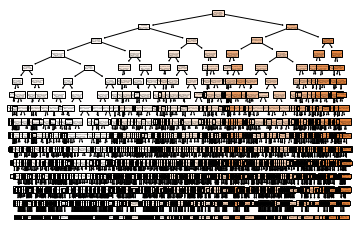

In [742]:
dtr=tree.DecisionTreeRegressor(max_depth=15,min_samples_split=15,min_samples_leaf=3,random_state=1)
tree.plot_tree(dtr.fit(x_train,y_train), filled=True,feature_names=x_train.columns)

**Using Grid Search for Random Forest**


In [86]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [87]:
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [88]:
best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}

**Now, Let's compare the models again**

In [89]:
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 300,
                            random_state=1)
dtr = tree.DecisionTreeRegressor(max_depth=15,min_samples_split=15,min_samples_leaf=3,random_state=1)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:
    if i != annr:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        1158.092089  1163.011723        0.887856    0.888637
Decision Tree Regressor   322.357416   501.662177        0.991311    0.979280
Random Forest Regressor   418.021904   488.452513        0.985389    0.980357


In [90]:
rfrfeat=rfr.feature_importances_
dtrfeat=dtr.feature_importances_
print(pd.DataFrame({'Feature_Importance_RF': rfrfeat,'Feature_Importance_DT':dtrfeat},
                   index=x_test.columns).sort_values(by=['Feature_Importance_DT','Feature_Importance_RF'],ascending=False))

               Feature_Importance_RF  Feature_Importance_DT
carat                       0.643394               0.707158
y                           0.254918               0.193684
clarity_carat               0.065526               0.068707
color_carat                 0.021436               0.024688
cut_carat                   0.001229               0.002292
z                           0.001321               0.001805
x                           0.012176               0.001665
